In [4]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
plt.rcParams[dpi=20]

SyntaxError: invalid syntax (<ipython-input-4-f7a8f46b591a>, line 5)

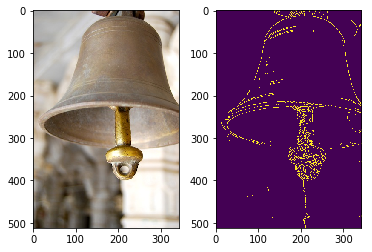

In [7]:
# img = cv2.imread('bell.jpg', 4)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.imread('../input/bell.jpg', -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img1 = cv2.Canny(img, 100, 140)
# img1 = cv2.Canny(img, 50, 170)
# 0.5 2.5
# 0.02 1.0
# cv2.imshow('',img1);
# cv2.waitKey(0);
# cv2.destroyAllWindows();

plt.subplot(1,2,1);plt.imshow(img)
plt.subplot(1,2,2);plt.imshow(img1)
plt.show()

In [21]:
def convolve2d(image, kernel, k):
#     kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    image = image.astype('float')
    kernel = np.array(kernel)
#     kernel = kernel.astype('float32')
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    
    image_padded = np.zeros((image.shape[0] + k-1, image.shape[1] + k-1))   
    image_padded[0:image.shape[0],0:image.shape[1]] = image
#     image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+k,x:x+k]).sum()        
    return output


def Filter(img ,Mx ,My ,k):
    img = np.array(img)
    imgx = convolve2d(img, Mx, k)
    imgy = convolve2d(img, My, k)
#     ans = imgy
    ans = np.sqrt(imgx**2 + imgy**2)
    return ans.astype('uint8')

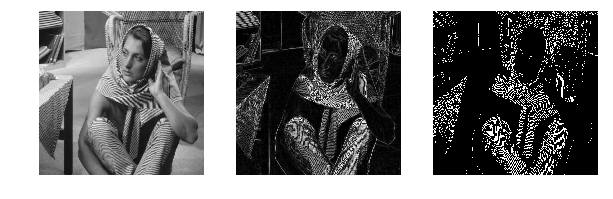

In [22]:
# Prewitt Filter
# img = Image.open('barbara.jpg').convert('L')
img = cv2.imread('../input/barbara.jpg',-1)
Mx = [[-1,0,1],[-1,0,1],[-1,0,1]]

My = [[1,1,1],[0,0,0],[-1,-1,-1]]
ans = Filter(img,Mx,My,3)
ans1 = cv2.Canny(img, 50, 170)

fig = plt.figure(figsize=[10, 10])
plt.subplot(1,3,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1, cmap='gray');plt.axis('off')
plt.show()

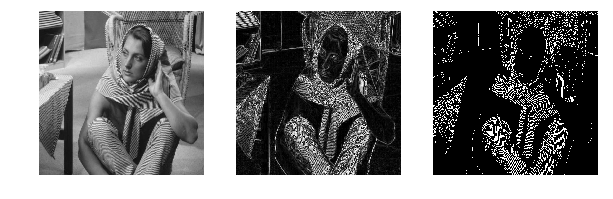

In [23]:
# Sobel Filter
# img = Image.open('barbara.jpg').convert('L')
img = cv2.imread('../input/barbara.jpg',-1)
Mx = [[-1,0,1],[-2,0,2],[-1,0,1]]
My = [[1,2,1],[0,0,0],[-1,-2,-1]]
ans = Filter(img,Mx,My,3)
ans1 = cv2.Canny(img, 50, 170)

fig = plt.figure(figsize=[10,10])
plt.subplot(1,3,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1, cmap='gray');plt.axis('off')
plt.show()

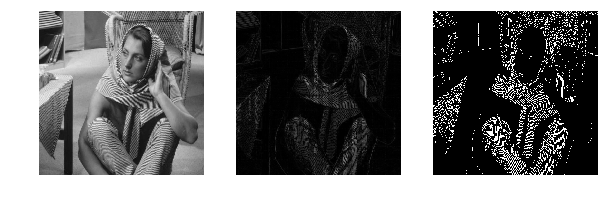

In [24]:
# Roberts Filter
# img = Image.open('barbara.jpg').convert('L')
img = cv2.imread('../input/barbara.jpg',-1)
Mx = [[0,1],[-1,0]]
My = [[1,0],[0,-1]]
ans = Filter(img,Mx,My,2)
ans1 = cv2.Canny(img, 50, 170)

fig = plt.figure(figsize=[10,10])
plt.subplot(1,3,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1, cmap='gray');plt.axis('off')
plt.show()

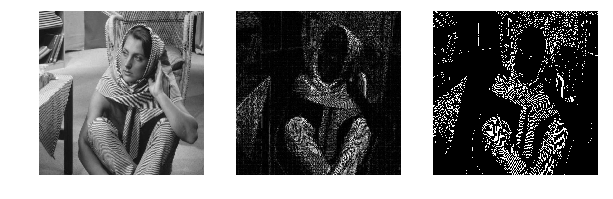

In [25]:
# Laplacian Filter
# img = Image.open('barbara.jpg').convert('L')
img = cv2.imread('../input/barbara.jpg',-1)
Mx = [[0,1,0],[1,-4,1],[0,1,0]]
My = [[1,1,1],[1,-8,1],[1,1,1]]
ans = Filter(img,Mx,My,3)
ans1 = cv2.Canny(img, 50, 170)

fig = plt.figure(figsize=[10,10])
plt.subplot(1,3,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1, cmap='gray');plt.axis('off')
plt.show()

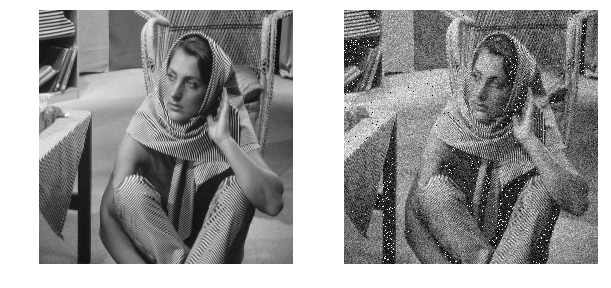

In [26]:
def addGaussNoise(img):
    img = np.array(img)
    w, h = img.shape
    mean = (0)*255
    var = (2)*255
    sigma = var**0.5
    noise = np.random.normal(mean, sigma, (w, h)).reshape(w, h)
#     print (noise)
    img = img + noise
    return img
# img = Image.open('barbara.jpg').convert('L')
img = cv2.imread('../input/barbara.jpg',-1)
noisy_image = addGaussNoise(img)
noisy_image = noisy_image.astype('uint8')

fig = plt.figure(figsize=[10, 10])
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(noisy_image, cmap='gray');plt.axis('off')
plt.show()


# Apply above FILTERS on the gaussian noise image .

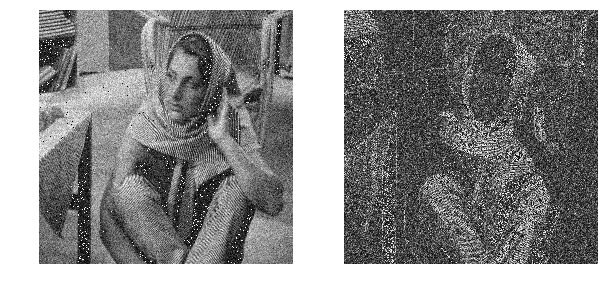

In [27]:
# Prewitt Filter
# img = Image.open('barbara.jpg').convert('L')
img = noisy_image
Mx = [[-1,0,1],[-1,0,1],[-1,0,1]]

My = [[1,1,1],[0,0,0],[-1,-1,-1]]
ans = Filter(noisy_image,Mx,My,3)

fig = plt.figure(figsize=[10, 10])
plt.subplot(1,2,1);plt.imshow(noisy_image, cmap='gray');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.show()

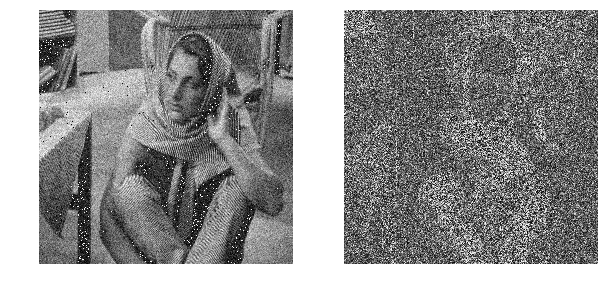

In [28]:
# Sobel Filter
# img = Image.open('barbara.jpg').convert('L')
img = noisy_image
Mx = [[-1,0,1],[-2,0,2],[-1,0,1]]

My = [[1,2,1],[0,0,0],[-1,-2,-1]]
ans = Filter(noisy_image,Mx,My,3)

fig = plt.figure(figsize=[10, 10])
plt.subplot(1,2,1);plt.imshow(noisy_image, cmap='gray');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.show()

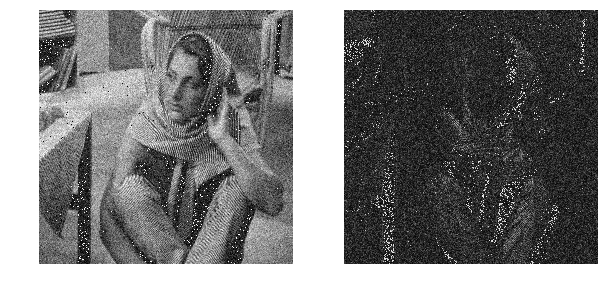

In [29]:
# Roberts Filter
# img = Image.open('barbara.jpg').convert('L')
img = noisy_image
Mx = [[0,1],[-1,0]]

My = [[1,0],[0,-1]]
ans = Filter(noisy_image,Mx,My,2)

fig = plt.figure(figsize=[10, 10])
plt.subplot(1,2,1);plt.imshow(noisy_image, cmap='gray');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.show()

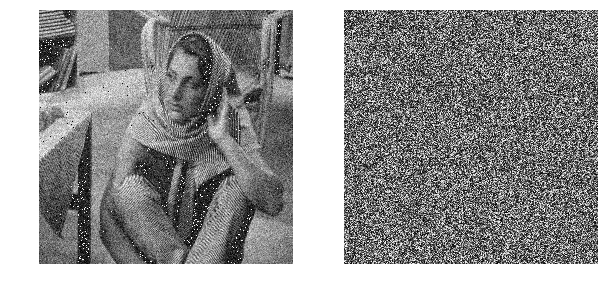

In [30]:
# Laplacian Filter
# img = Image.open('barbara.jpg').convert('L')
img = noisy_image
Mx = [[0,1,0],[1,-4,1],[0,1,0]]
My = [[1,1,1],[1,-8,1],[1,1,1]]
ans = Filter(img,Mx,My,3)

fig = plt.figure(figsize=[10,10])
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.show()

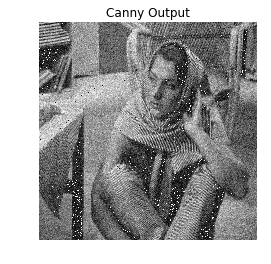

In [31]:
img = noisy_image
ans = cv2.Canny(img, 50, 170)

plt.imshow(img, cmap='gray');plt.axis('off');plt.title('Canny Output')
plt.show()